In [1]:
'''Import your data into a Pandas DataFrame.
Merge your DataFrames.
Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
Determine the mean, median, and mode for the following:
The total number of rides for each city type.
The average fares for each city type.
The total number of drivers for each city type.
Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
The number of rides for each city type.
The fares for each city type.
The number of drivers for each city type.
Create a pie chart that visualizes each of the following data for each city type:
The percent of total fares.
The percent of total rides.
The percent of total drivers.'''

'Import your data into a Pandas DataFrame.\nMerge your DataFrames.\nCreate a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.\nDetermine the mean, median, and mode for the following:\nThe total number of rides for each city type.\nThe average fares for each city type.\nThe total number of drivers for each city type.\nCreate box-and-whisker plots that visualize each of the following to determine if there are any outliers:\nThe number of rides for each city type.\nThe fares for each city type.\nThe number of drivers for each city type.\nCreate a pie chart that visualizes each of the following data for each city type:\nThe percent of total fares.\nThe percent of total rides.\nThe percent of total drivers.'

In [2]:
#dependencies
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
city_data_file = 'Resources/city_data.csv'
ride_data_file = 'Resources/ride_data.csv'
city_df = pd.read_csv(city_data_file)
ride_df = pd.read_csv(ride_data_file)
city_df.head()
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [4]:
#5.2.4 Explore data in pandas

#Inspecting city df

#Get all the rows that contain null values.
city_df.count
#or 
city_df.isnull().sum()






city            0
driver_count    0
type            0
dtype: int64

In [5]:
#Make sure the driver_count column has an integer data type.
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
#Find out how many data points there are for each type of city.
city_df.type.unique()
#array(['Urban', 'Suburban', 'Rural'], dtype=object)

sum(city_df.type == 'Urban')
#66

sum(city_df.type == 'Suburban')
#36

sum(city_df.type == 'Rural')
#18


###Better way to do this is 


city_df.type.value_counts()
# Urban       66
# Suburban    36
# Rural       18
# Name: type, dtype: int64

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [7]:
# Do the same thing for ride data
ride_df.count()
ride_df.isnull().sum()

ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [8]:
pyber_data_df = pd.merge(ride_df, city_df, how = 'left', on = ['city', 'city'])

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [9]:
#5.3.1 Create DataFrames for Each Type of City

urban_df = pyber_data_df[pyber_data_df.type == 'Urban']
suburban_df = pyber_data_df[pyber_data_df.type == 'Suburban']
rural_df = pyber_data_df[pyber_data_df.type == 'Rural']

In [10]:
# Get the number of rides for each city in each type
urban_ride_count_s = urban_df.groupby(["city"]).count().ride_id
suburban_ride_count_s = suburban_df.groupby(['city']).count().ride_id
rural_ride_count_s = rural_df.groupby(['city']).count().ride_id



In [11]:
#Get avg fare for each city in each type

urban_avg_fare_s = urban_df.groupby(["city"]).mean().fare
suburban_avg_fare_s = suburban_df.groupby(["city"]).mean().fare
rural_avg_fare_s = rural_df.groupby(["city"]).mean().fare



In [12]:
#num of drivers for each city type

urban_driver_count_s = urban_df.groupby(['city']).mean().driver_count
suburban_driver_count_s = suburban_df.groupby(['city']).mean().driver_count
rural_driver_count_s = rural_df.groupby(['city']).mean().driver_count
urban_driver_count_s

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

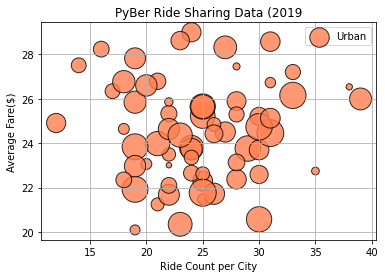

In [13]:
#5.3.5 Creating the bubble charts
#plot avg fare(y) vs ride count (x)

#add title, legend, axis lables, set size equal to number of drivers, change color
plt.scatter(urban_ride_count_s, urban_avg_fare_s, 
            s = urban_driver_count_s*10, c='coral', 
            edgecolors='black', linewidths=1, 
            alpha=.8, label = 'Urban' )

plt.title('PyBer Ride Sharing Data (2019')
plt.xlabel('Ride Count per City')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()


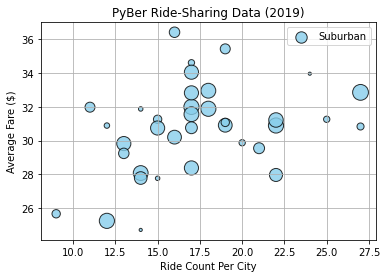

In [14]:
#Suburban Bubble Chart

plt.scatter(suburban_ride_count_s,
      suburban_avg_fare_s,
      s=10*suburban_driver_count_s, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Ride Count Per City")
plt.grid(True)
# Add the legend.
plt.legend()


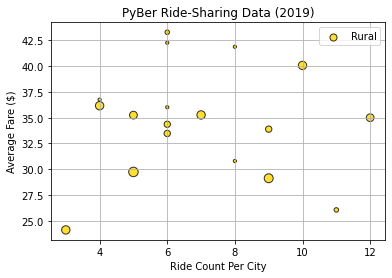

In [15]:
#Rural Bubble Chart
plt.scatter(rural_ride_count_s,
      rural_avg_fare_s,
      s=10*rural_driver_count_s, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Ride Count Per City")
plt.grid(True)
# Add the legend.
plt.legend()

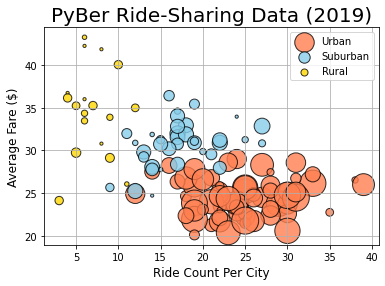

In [16]:
#5.3.6 Show all city types on same chart
plt.scatter(urban_ride_count_s, urban_avg_fare_s, 
            s = urban_driver_count_s*10, c='coral', 
            edgecolors='black', linewidths=1, 
            alpha=.8, label = 'Urban' )

plt.scatter(suburban_ride_count_s,
      suburban_avg_fare_s,
      s=10*suburban_driver_count_s, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count_s,
      rural_avg_fare_s,
      s=10*rural_driver_count_s, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Ride Count Per City", fontsize = 12)
plt.grid(True)
plt.legend()

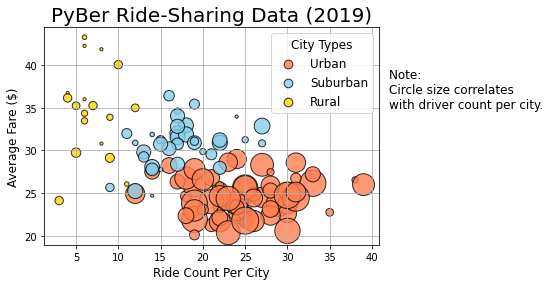

In [17]:
#Cleaning up the legend

plt.scatter(urban_ride_count_s, urban_avg_fare_s, 
            s = urban_driver_count_s*10, c='coral', 
            edgecolors='black', linewidths=1, 
            alpha=.8, label = 'Urban' )

plt.scatter(suburban_ride_count_s,
      suburban_avg_fare_s,
      s=10*suburban_driver_count_s, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count_s,
      rural_avg_fare_s,
      s=10*rural_driver_count_s, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Ride Count Per City", fontsize = 12)
plt.grid(True)
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#add text label explaining circle size

plt.text(42, 35, "Note: \nCircle size correlates \nwith driver count per city.", fontsize="12")

#save chart to analysis folder

plt.savefig('Analysis/Fig1.png', dpi = 300, bbox_inches = 'tight')



In [18]:
#5.4.1 Summary Statistics

urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [19]:
suburban_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [20]:
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [21]:
#Summary Statistics of Ride count for each city

urban_ride_count_s.describe(), suburban_ride_count_s.describe(), rural_ride_count_s.describe()

(count    66.000000
 mean     24.621212
 std       5.408726
 min      12.000000
 25%      21.000000
 50%      24.000000
 75%      28.000000
 max      39.000000
 Name: ride_id, dtype: float64,
 count    36.000000
 mean     17.361111
 std       4.323707
 min       9.000000
 25%      14.000000
 50%      17.000000
 75%      19.250000
 max      27.000000
 Name: ride_id, dtype: float64,
 count    18.000000
 mean      6.944444
 std       2.508157
 min       3.000000
 25%       5.250000
 50%       6.000000
 75%       8.750000
 max      12.000000
 Name: ride_id, dtype: float64)

In [22]:
#Calculating mean using pandas mean method

round(urban_ride_count_s.mean(),2), round(suburban_ride_count_s.mean(),2), round(rural_ride_count_s.mean(), 2)

(24.62, 17.36, 6.94)

In [23]:
#NumPy mean() and median() Functions and SciPy mode() Function
import numpy as np
import scipy.stats as sts

In [42]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count_s)

median_urban_ride_count = np.median(urban_ride_count_s)

mode_urban_ride_count = sts.mode(urban_ride_count_s)

print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")



The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [68]:
#5.4.2 Summary Stats for Fare by city type

urban_fare_s = urban_df.fare
suburban_fare_s = suburban_df.fare
rural_fare_s = rural_df.fare


In [49]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fare_s)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fare_s)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fare_s)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [51]:
print(np.mean(suburban_df.fare),
np.mean(rural_df.fare))

30.970128000000003 34.623439999999995


In [69]:
# Summary Statistics for the Number of Drivers by City Type

urban_drivers_s = urban_df.driver_count
suburban_drivers_s = suburban_df.driver_count
rural_drivers_s = rural_df.driver_count
urban_drivers_s.describe()

count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

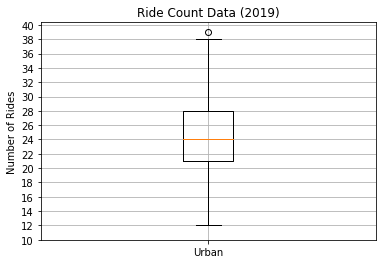

In [60]:
#5.4.4 Create box and whisker plots
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count_s, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

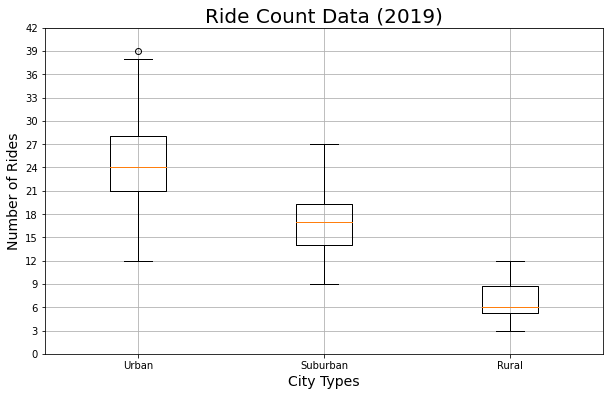

In [59]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count_s, suburban_ride_count_s, rural_ride_count_s]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [66]:
#finding the outlier in urban type

urban_ride_count_s[urban_ride_count_s == 39].index[0]

'West Angela'

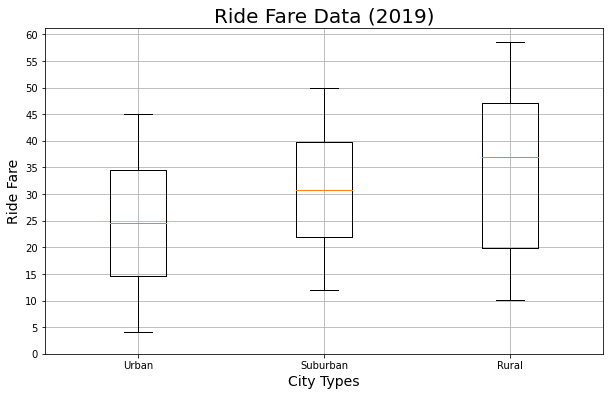

(count    1625.000000
 mean       24.525772
 std        11.738649
 min         4.050000
 25%        14.550000
 50%        24.640000
 75%        34.580000
 max        44.970000
 Name: fare, dtype: float64,
 count    625.000000
 mean      30.970128
 std       10.677508
 min       12.050000
 25%       21.970000
 50%       30.750000
 75%       39.830000
 max       49.960000
 Name: fare, dtype: float64,
 count    125.000000
 mean      34.623440
 std       14.558046
 min       10.110000
 25%       19.900000
 50%       37.050000
 75%       47.070000
 max       58.550000
 Name: fare, dtype: float64)

In [76]:
#Now doing it with fare data

x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fare_s, suburban_fare_s, rural_fare_s]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Ride Fare',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 61, step=5))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()
urban_fare_s.describe(), suburban_fare_s.describe(), rural_fare_s.describe()

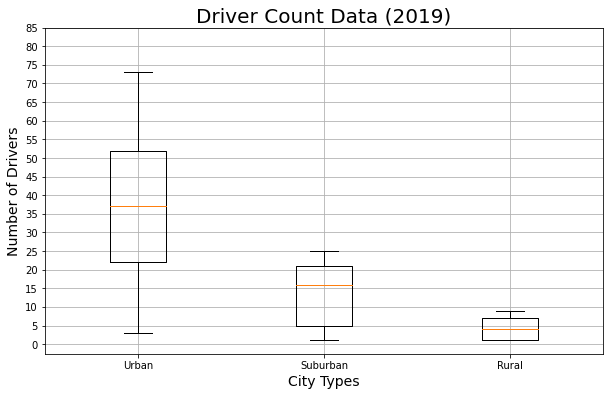

(count    1625.000000
 mean       36.678154
 std        20.075545
 min         3.000000
 25%        22.000000
 50%        37.000000
 75%        52.000000
 max        73.000000
 Name: driver_count, dtype: float64,
 count    625.000000
 mean      13.712000
 std        8.042372
 min        1.000000
 25%        5.000000
 50%       16.000000
 75%       21.000000
 max       25.000000
 Name: driver_count, dtype: float64,
 count    125.000000
 mean       4.296000
 std        2.691156
 min        1.000000
 25%        1.000000
 50%        4.000000
 75%        7.000000
 max        9.000000
 Name: driver_count, dtype: float64)

In [79]:
# Create the box-and-whisker plot for the driver count data
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers_s, suburban_drivers_s, rural_drivers_s]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 86, step=5))
ax.grid()
#Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()
urban_drivers_s.describe(), suburban_drivers_s.describe(), rural_drivers_s.describe()

In [105]:
#5.5.1 Get Percentage of Fares for each city type

# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

#Get sum of all fares

total_fares = pyber_data_df.fare.sum()
total_fares

#create series of fare percent by city type
fare_percents_by_type_s = sum_fares_by_type / total_fares


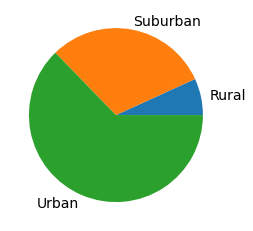

In [106]:
#5.5.2 Create pie chart for fare percentage
### used index to list method chaining to use series indexes instead of writing out list as shown in module
plt.pie(fare_percents_by_type_s, labels=fare_percents_by_type_s.index.tolist())
plt.show()


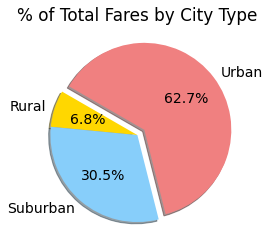

In [107]:
# Build the percentage of fares by city type pie chart.
plt.pie(fare_percents_by_type_s,
    labels=fare_percents_by_type_s.index.tolist(),
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

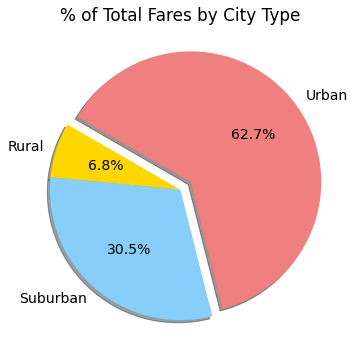

In [108]:
#Want to change font size to 14, cant do this within pyplot so must import mpl

# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(fare_percents_by_type_s,
    labels=fare_percents_by_type_s.index.tolist(),
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [109]:
#5.6.1 Calculate Ride Percentages by city type

ride_percents_by_type_s = 100 * pyber_data_df.groupby(['type']).count().ride_id / pyber_data_df.count().ride_id
ride_percents_by_type_s



type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

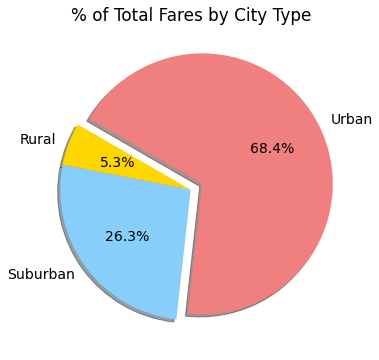

In [110]:
#5.6.2 Create pie charts for ride percentages
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents_by_type_s,
    labels=ride_percents_by_type_s.index.tolist(),
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()


In [146]:
#5.7.1 Redo for Driver percentages 

driver_percents_by_type_s = 100 * city_df.groupby(["type"]).sum().driver_count/city_df.sum().driver_count

driver_percents_by_type_s

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

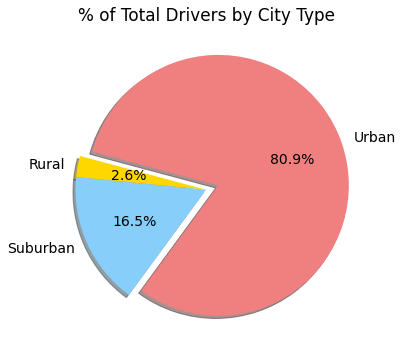

In [147]:
#5.7.2 Creating pie charts for driver percents

# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents_by_type_s,
    labels=driver_percents_by_type_s.index.tolist(),
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()
